In [ ]:
# Część 1

In [56]:
from sklearn import datasets

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(iris.keys()))

# Zobaczmy jak wyglądają elementy zbioru
print('Typ pierwszego elementu z \'data\': ', type(iris['data'][0]))
print('Kilka pierwszych elementów:')
print(iris['data'][0:5])

# Kwiaty mają swoje etykiety numeryczne...
print('Pierwszy kwiat w zbiorze to: ', iris['target'][0])

# ... a odpowiadające im nazwy są osobno
print('Pierwszy kwiat w zbiorze (słownie) to: ', iris['target_names'][0])

# Etykiety które występują
print('Cechy irysów w zbiorze to: ', iris['feature_names'])

Elementy zbioru:  ['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']
Typ pierwszego elementu z 'data':  <class 'numpy.ndarray'>
Kilka pierwszych elementów:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Pierwszy kwiat w zbiorze to:  0
Pierwszy kwiat w zbiorze (słownie) to:  setosa
Cechy irysów w zbiorze to:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Zadanie 1: sprawdź poniżej inne elementy wczytanego zbioru danych, w szczególności opis.
# Opisz w max 3 zdaniach swoimi słowami co zawiera zbiór danych


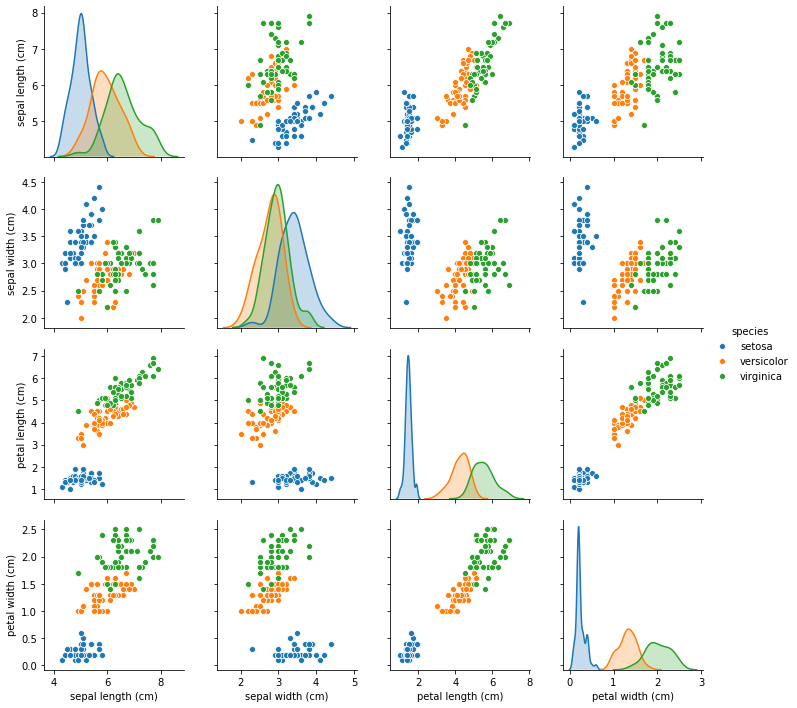

In [57]:
# Ta sekcja jest tylko na potrzeby zobrazowania zbioru danych

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# wykresy będą tworzone przy pomocy pakietu seaborn
import seaborn as sns

# konwersja na obiekt pandas.DataFrame
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# funkcja która nam zamieni wartości 0, 1, 2 na pełny opis tekstowy dla gatunku
targets = map(lambda x: iris['target_names'][x], iris['target'] )

# doklejenie informacji o gatunku do reszty dataframe
iris_df['species'] = np.array(list(targets))

# wykres
sns.pairplot(iris_df, hue='species')
plt.show()

In [ ]:
# zobaczmy jak naocznie wyglądają dane
iris_df.head(10)

In [82]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Konwencja, często spotykana w dokumentacji sklearn to X dla cech oraz y dla etykiet
X = iris.data
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze - zaskoczenie - uczącym
knn.fit(X_train, y_train)

# Przewidujemy wartości dla zbioru testowego
y_pred = knn.predict(X_test)

# Sprawdzamy kilka pierwszych wartości przewidzianych
print(y_pred[:5])

# Sprawdzamy dokładność klasyfikatora
print(knn.score(X_test, y_test))

[1 2 1 1 0]
0.9111111111111111


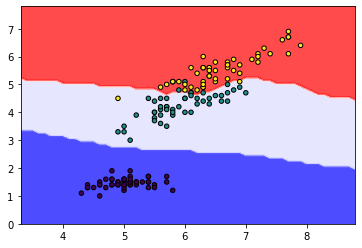

In [96]:
# Na przykładzie dwóch cech sprawdźmy jakie są granice decyzyjne

%matplotlib inline

# Tworzymy płaszczyznę wszystkich możliwych wartości dla cechy 0 oraz 2, z krokiem 0.1
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Uczymy klasyfikator na tylko dwóch wybranych cechach
knn.fit(X_train[:, [0, 2]], y_train)

# Przewidujemy każdy punkt na płaszczyźnie
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Tworzymy contourplot
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.bwr)
plt.scatter(X[:, 0], X[:, 2], c=y, s=20, edgecolor='k')
plt.show()

In [ ]:
# Zadanie 2:
# Stwórz listę kilku wybranych przez siebie wartości dla parametru n_neighbors
# W pętli 'for' użyj kolejnych wartości parametru do stworzenia klasyfikatora
# Następnie naucz go na danych uczących
# Zapisz wynik scoringu na danych testowych do osobnej listy

lista_n = []
dokladnosci = []

for n_neighb in lista_n:
    
    knn = ...
    dokladnosc = knn.score(...)
    dokladnosci.append(dokladnosc)

# Wyświetl wykres zależności między liczbą sąsiadów a dokładnością.

%matplotlib.inline
...
plt.show()

In [ ]:
# Część 2

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

# Wczytaj przykładowy zbiór danych - cyfry odręczne z MNIST
digits = datasets.load_digits()

# Zobaczmy jakie dane mamy w zbiorze
print('Elementy zbioru: ', list(digits.keys()))

# Każda cyfra to po prostu macierz 8x8
print('Typ pierwszego elementu z \'images\': ', type(digits['images'][0]))
print(digits['images'][0])

# Cyfry mają swoje etykiety
print('Pierwsza cyfra w zbiorze to: ', digits['target'][0])

# Możemy też wyświetlić dwuwymiarową macierz jako obrazek, za pomocą imshow
plt.imshow(digits.images[0])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Podzielmy zbiór na cechy oraz etykiety
# Trzymamy się konwencji, X dla cech oraz y dla etykiet
X = digits.data
y = digits.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator k-NN używając parametru 5 sąsiadów
knn = KNeighborsClassifier(n_neighbors = 5)

# Uczymy klasyfikator na zbiorze uczącym
knn.fit(X_train, y_train)

# Sprawdzamy dokładność klasyfikatora
print(knn.score(X_test, y_test))

In [ ]:
# Sprawdźmy coś więcej niż dokładność
# na początek zapiszmy wyniki predykcji

y_pred = knn.predict(X_test)

# Sprawdźmy wyniki klasyfikacji
print(y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Jak bardzo wyniki różnią się od prawdziwych wartości?

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
# Opisy różnych metryk znajdziesz tutaj:
# https://en.wikipedia.org/wiki/Confusion_matrix
# Od biedy:
# https://pl.wikipedia.org/wiki/Tablica_pomyłek

In [ ]:
# Klasyfikatory potrafią określać również prawdopodobieństwo przynależności do konkretnej klasy

y_pred_proba = knn.predict_proba(X_test)

# Sprawdźmy wyniki klasyfikacji dla kilku pierwszych wartości
print(y_pred_proba[:10])

In [ ]:
# Część 3

In [ ]:
# Zadanie 3:
# wczytaj dane o winach za pomocą funkcji poniżej
from sklearn.datasets import load_wine

# Zbadaj zbiór danych. Stwórz wykresy obrazujące ten zbiór danych.
# Podziel zbiór danych na uczący i testowy.
# Wytrenuj klasyfikator kNN
# Dokonaj predykcji na zbiorze testowym
# Wypisz raport z uczenia: confusion_matrix oraz classification_report

In [55]:
# Zadanie bonus:
# Wczytaj dane za pomocą funkcji fetch_openml
from sklearn.datasets import fetch_openml
# Funkcja przyjmuje jako parametr nazwę zbioru danych z https://www.openml.org/search?type=data
# Proponuję zbiór 'bank-marketing', ale możesz wybrać dowolny inny z kategorii "klasyfikacja"
# Reszta: jak w zadaniu 3.
